# Analyzing Transformer Anomaly Detection Results
This notebook visualizes and analyzes the anomaly mask results, thresholds, bounding boxes, and evaluates the suitability of the PCA-based method for the provided transformer thermal image dataset.
## Outline
1. Import Required Libraries
2. Load and Visualize Sample Images
3. Run Inference and Visualize Anomaly Mask
4. Analyze Residual and Diff Thresholds
5. Inspect Detected Regions and Bounding Boxes
6. Compare Results Across Multiple Images
7. Explore Dataset and Method Suitability

In [4]:
%pip install matplotlib
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os
from glob import glob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


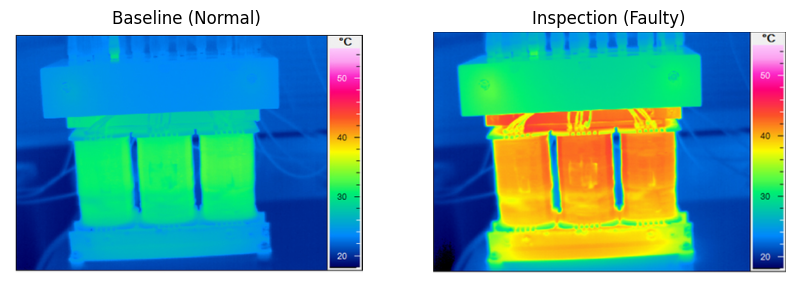

In [5]:
# Load and Visualize Sample Images
baseline_path = 'Sample_Thermal_Images/T4/normal/T4_normal_001.png'
inspection_path = 'Sample_Thermal_Images/T4/faulty/T4_faulty_001.png'
baseline_img = np.array(Image.open(baseline_path))
inspection_img = np.array(Image.open(inspection_path))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Baseline (Normal)')
plt.imshow(baseline_img, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Inspection (Faulty)')
plt.imshow(inspection_img, cmap='gray')
plt.axis('off')
plt.show()

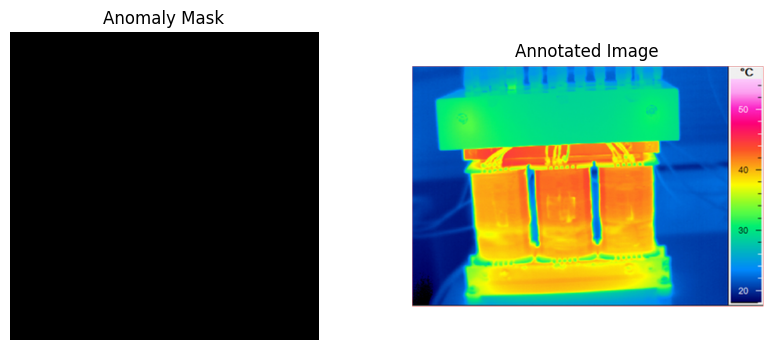

In [6]:
# Run Inference and Visualize Anomaly Mask
mask_path = 'results/annotated_mask.png'
annotated_path = 'results/annotated.png'
mask_img = np.array(Image.open(mask_path))
annotated_img = np.array(Image.open(annotated_path))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Anomaly Mask')
plt.imshow(mask_img, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Annotated Image')
plt.imshow(annotated_img)
plt.axis('off')
plt.show()

## Analyze Residual and Diff Thresholds
The residual and diff thresholds control the sensitivity of anomaly detection. If these values are too low or too high, the mask may cover the entire image or miss anomalies.
- Residual threshold: Value used to flag pixels with high reconstruction error from PCA.
- Diff threshold: Value used to flag pixels with high absolute difference between baseline and inspection images.
You can print these values from the inference script output or extract them from the model/config.

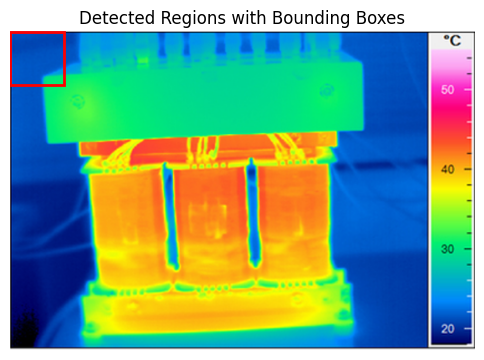

In [7]:
# Inspect Detected Regions and Bounding Boxes
import matplotlib.patches as patches
def show_bounding_boxes(image, mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.imshow(image, cmap='gray')
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.title('Detected Regions with Bounding Boxes')
    plt.axis('off')
    plt.show()

# Convert mask to binary if needed
mask_bin = (mask_img > 0).astype(np.uint8)
show_bounding_boxes(inspection_img, mask_bin)

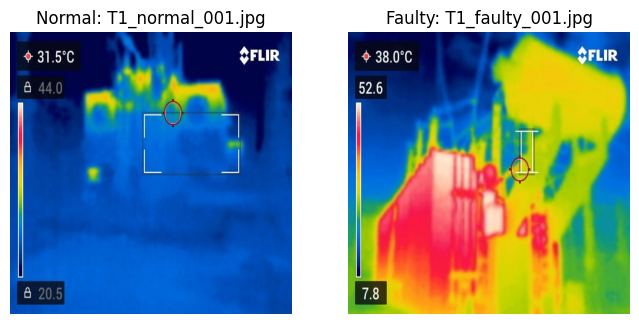

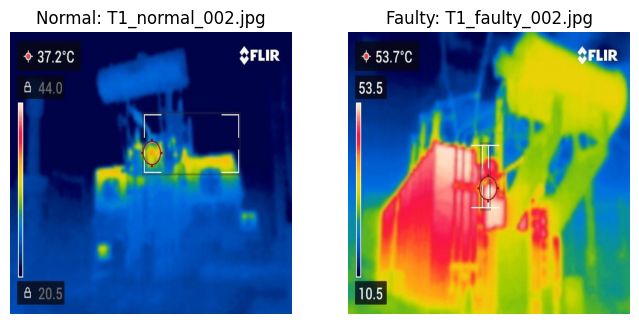

In [8]:
# Compare Results Across Multiple Images
normal_imgs = sorted(glob('Sample_Thermal_Images/T1/normal/*.jpg'))[:2]
faulty_imgs = sorted(glob('Sample_Thermal_Images/T1/faulty/*.jpg'))[:2]
for n_img, f_img in zip(normal_imgs, faulty_imgs):
    baseline = np.array(Image.open(n_img))
    inspection = np.array(Image.open(f_img))
    # For demonstration, just show images (in practice, run inference and show mask/annotated)
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.title(f'Normal: {os.path.basename(n_img)}')
    plt.imshow(baseline, cmap='gray')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title(f'Faulty: {os.path.basename(f_img)}')
    plt.imshow(inspection, cmap='gray')
    plt.axis('off')
    plt.show()

## Explore Dataset and Method Suitability
Based on the visualizations and results above, consider:
- Is the PCA-based anomaly detection method consistently detecting meaningful regions, or is it flagging the entire image?
- Are the images in the dataset sufficiently different between normal and faulty cases?
- Is preprocessing (grayscale, resizing) affecting detection?
- Would a different method (e.g., autoencoder, CNN, classical image subtraction) be more suitable for this dataset?
Summarize findings and suggest next steps for improving anomaly detection.